# House price predictions -Kaggle

The aim of this work is making predictions on the house prices in Ames, Iwoa

## data description

Data set in Kaggle has 79 variable corresponding to various house attributes and one target variable,price. By looking at the variables, it can be categorized into various groups
lot/land, location, age, basement, roof, garage, kitchen, external features to name a few.

### EDA

importing necessary libraries

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing data sets

In [277]:
df_train = pd.read_csv('C:/Users/Bhagya Amarasekara/Documents/Bhagya/analysis/house prices/train.csv')
df_test = pd.read_csv('C:/Users/Bhagya Amarasekara/Documents/Bhagya/analysis/house prices/test.csv')

In [278]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [279]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It looks like we have missing variables and categorical, numerical, and ordinal variables. Let's look at null values first.

In [280]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:25])
print(nulls)

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0


Let's combine both train and test data and have a look

In [281]:
df_train1=df_train.copy()
df_train1.drop(['SalePrice'],axis=1,inplace=True)
df_new=pd.concat([df_train1,df_test])

In [282]:
nulls = pd.DataFrame(df_new.isnull().sum().sort_values(ascending=False)[:25])
print(nulls)

                 0
PoolQC        2909
MiscFeature   2814
Alley         2721
Fence         2348
FireplaceQu   1420
LotFrontage    486
GarageCond     159
GarageQual     159
GarageYrBlt    159
GarageFinish   159
GarageType     157
BsmtCond        82
BsmtExposure    82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
MasVnrType      24
MasVnrArea      23
MSZoning         4
BsmtHalfBath     2
Utilities        2
Functional       2
BsmtFullBath     2
BsmtFinSF1       1
Exterior1st      1


Looks like test data has null values too. Let's impute missing values for all the data set.

In [283]:
df_new['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [284]:
df_new['MSZoning'].replace({'RL':1,'RM':1,'RH':1,'FV':1,'C (all)':0},inplace=True)

In [285]:
df_new['MSZoning'].isnull().values.any()

True

fill the missing vale with most occuring category

In [286]:
df_new['MSZoning'].fillna(1,inplace=True)

Lot frontage has missing values, Let's check whether it has a relationship with Lot area

In [287]:
lotareasq=df_new['LotArea'].apply(np.sqrt)

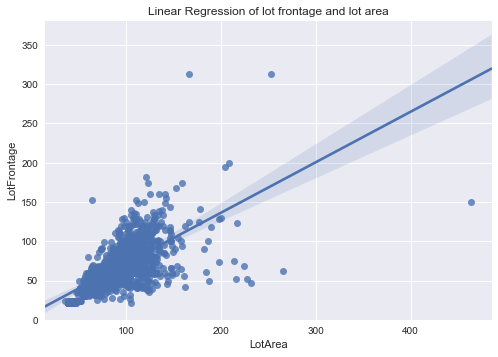

In [288]:
sns.regplot(x=lotareasq, y=df_new["LotFrontage"]);
plt.title("Linear Regression of lot frontage and lot area")
plt.ylim(0,)
plt.show()

Let's impute missing values by fitting them into a regression model.

In [289]:
cond = df_new['LotFrontage'].isnull()
z=np.polyfit(lotareasq[~cond],df_new.LotFrontage[~cond],1) 
df_new.LotFrontage[cond]=z[0]*lotareasq[cond]+z[1]

C:\Users\Bhagya Amarasekara\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Checking the distribution after imputation

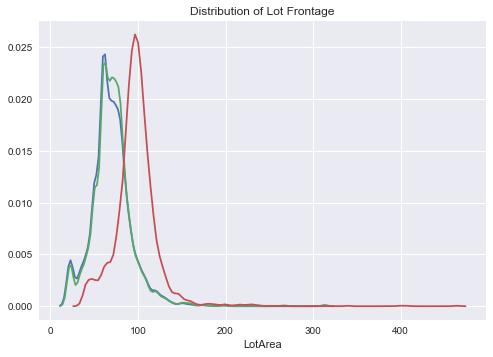

In [290]:
sns.distplot(df_new.LotFrontage[~cond],hist=False)
sns.distplot(df_new.LotFrontage,hist=False)
sns.distplot(lotareasq,hist=False)
plt.title("Distribution of Lot Frontage")
plt.show()

Blue is the original distribution, the green is the new one with missing values inferred and the red is the curve of the square root of lot area.

fill missing data & converting Categorical into numerical features

In [291]:
df_new['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [292]:
df_new['Street'].replace('Pave',value=1,inplace=True)
df_new['Street'].replace('Grvl',value=0,inplace=True)

In [293]:
df_new['Alley'].fillna(0,inplace=True)

In [294]:
df_new['Alley'].replace({'Pave':1,'Grvl':0},inplace=True)                          

In [295]:
df_new['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [296]:
df_new['LotShape'].replace(['IR1','IR2','IR3'],value=0,inplace=True)
df_new['LotShape'].replace('Reg',value=1,inplace=True)

In [297]:
df_new['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [298]:
df_new['LandContour'].replace('Lvl',value=1,inplace=True)
df_new['LandContour'].replace(['Bnk','HLS','Low'],value=0,inplace=True)

In [299]:
df_new['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [300]:
df_new['Utilities'].replace('AllPub',value=1,inplace=True)
df_new['Utilities'].replace('NoSeWa',value=0,inplace=True)
df_new['Utilities'].fillna(1,inplace=True)

In [301]:
df_new['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [302]:
df_new['LotConfig'].replace('Inside',value=1,inplace=True)
df_new['LotConfig'].replace('Corner',value=2,inplace=True)
df_new['LotConfig'].replace('CulDSac',value=3,inplace=True)
df_new['LotConfig'].replace(['FR2','FR3'],value=4,inplace=True)

In [303]:
df_new['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [304]:
df_new['LandSlope'].replace('Gtl',value=1,inplace=True)
df_new['LandSlope'].replace(['Mod','Sev'],value=0,inplace=True)

In [305]:
df_new['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

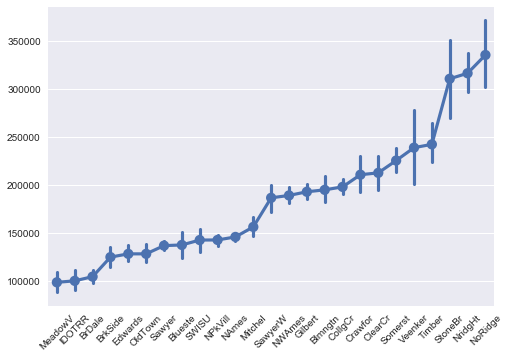

In [306]:
price=df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
sns.pointplot(x = df_train.Neighborhood.values, y = df_train.SalePrice.values,order = price.index)
plt.xticks(rotation=45)
plt.show()

In [307]:
price[price < 140000] = 1
price[(price >= 140000) & (price <= 200000)] = 2
price[price > 200000] = 3
price_dic=dict(price)
df_new['Neighborhood'].replace(price_dic,inplace=True)
df_new['Neighborhood']=df_new['Neighborhood'].astype(int)

In [308]:
df_new['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [309]:
cond1_dic={'Artery':1,'Feedr':1,'Norm':4,'RRNn':2,'RRAn':2,'PosN':3,'PosA':3,'RRNe':2,'RRAe':2}
df_new['Condition1'].replace(cond1_dic,inplace=True)

In [310]:
df_new['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [311]:
df_new['Condition2'].replace(cond1_dic,inplace=True)

In [312]:
df_new['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [313]:
df_train.groupby('BldgType')['SalePrice'].mean().sort_values()

BldgType
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
1Fam      185763.807377
Name: SalePrice, dtype: float64

In [314]:
df_new['BldgType'].replace(['1Fam','TwnhsE'],value=1,inplace=True)
df_new['BldgType'].replace(['2fmCon','Duplex','Twnhs'],value=0,inplace=True)

In [315]:
df_new['HouseStyle'].value_counts()
price=df_train.groupby('HouseStyle')['SalePrice'].mean().sort_values()

In [316]:
price[price < 140000] = 1
price[(price >= 140000) & (price <= 200000)] = 2
price[price > 200000] = 3
price_dic=dict(price)
df_new['HouseStyle'].replace(price_dic,inplace=True)
df_new['HouseStyle']=df_new['HouseStyle'].astype(int)

In [317]:
df_new['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [318]:
df_new['RoofStyle'].replace(['Hip','Shed'],value=1,inplace=True)
df_new['RoofStyle'].replace(['Gambrel','Gable','Mansard','Flat'],value=0,inplace=True)

In [319]:
df_new['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [320]:
df_new['RoofStyle'].replace(['Hip','Shed'],value=1,inplace=True)
df_new['RoofStyle'].replace(['Gambrel','Gable','Mansard','Flat'],value=0,inplace=True)

In [321]:
df_new['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [322]:
df_train.groupby('RoofMatl')['SalePrice'].mean().sort_values()

RoofMatl
Roll       137000.000000
ClyTile    160000.000000
CompShg    179803.679219
Metal      180000.000000
Tar&Grv    185406.363636
WdShake    241400.000000
Membran    241500.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64

In [323]:
df_new['RoofMatl'].replace(['WdShngl','Membran','WdShake'],value=1,inplace=True)
df_new['RoofMatl'].replace(['Tar&Grv','Metal','CompShg','ClyTile','Roll'],value=0,inplace=True)

In [324]:
df_train.groupby('Exterior1st')['SalePrice'].mean().sort_values()

Exterior1st
BrkComm     71000.000000
AsphShn    100000.000000
CBlock     105000.000000
AsbShng    107385.550000
MetalSd    149422.177273
Wd Sdng    149841.645631
WdShing    150655.076923
Stucco     162990.000000
HdBoard    163077.450450
Plywood    175942.379630
BrkFace    194573.000000
VinylSd    213732.900971
CemntBd    231690.655738
Stone      258500.000000
ImStucc    262000.000000
Name: SalePrice, dtype: float64

In [325]:
price=df_train.groupby('Exterior1st')['SalePrice'].mean().sort_values()
price[price < 140000] = 1
price[(price >= 140000) & (price <= 200000)] = 2
price[price > 200000] = 3
price_dic=dict(price)
df_new['Exterior1st'].replace(price_dic,inplace=True)
df_new['Exterior1st'].fillna(2,inplace=True)
df_new['Exterior1st']=df_new['Exterior1st'].astype(int)

In [326]:
df_train.groupby('Exterior2nd')['SalePrice'].mean().sort_values()

Exterior2nd
CBlock     105000.000000
AsbShng    114060.550000
Brk Cmn    126714.285714
AsphShn    138000.000000
Wd Sdng    148386.065990
MetalSd    149803.172897
Stucco     155905.153846
Stone      158224.800000
Wd Shng    161328.947368
HdBoard    167661.565217
Plywood    168112.387324
BrkFace    195818.000000
VinylSd    214432.460317
CmentBd    230093.833333
ImStucc    252070.000000
Other      319000.000000
Name: SalePrice, dtype: float64

In [327]:
price=df_train.groupby('Exterior2nd')['SalePrice'].mean().sort_values()
price[price < 140000] = 1
price[(price >= 140000) & (price <= 200000)] = 2
price[price > 200000] = 3
price_dic=dict(price)
df_new['Exterior2nd'].replace(price_dic,inplace=True)
df_new['Exterior2nd'].fillna(2,inplace=True)
df_new['Exterior2nd']=df_new['Exterior2nd'].astype(int)

In [328]:
df_new['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [329]:
df_train.groupby('MasVnrType')['SalePrice'].mean().sort_values()

MasVnrType
BrkCmn     146318.066667
None       156221.891204
BrkFace    204691.871910
Stone      265583.625000
Name: SalePrice, dtype: float64

In [330]:
df_new['MasVnrType'].replace(['BrkFace','Stone'],value=1,inplace=True)
df_new['MasVnrType'].replace(['BrkCmn','None'],value=0,inplace=True)
df_new['MasVnrType'].fillna(0,inplace=True)
df_new['MasVnrType']=df_new['MasVnrType'].astype(int)

In [331]:
df_new[df_new['MasVnrArea'].isnull()]['MasVnrType']

234     0
529     0
650     0
936     0
973     0
977     0
1243    0
1278    0
231     0
246     0
422     0
532     0
544     0
581     0
851     0
865     0
880     0
889     0
908     0
1132    0
1197    0
1226    0
1402    0
Name: MasVnrType, dtype: int32

In [332]:
df_new.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
0      3.572964
1    256.789007
Name: MasVnrArea, dtype: float64

In [333]:
df_new['MasVnrArea'].fillna(0,inplace=True)

In [334]:
qual_dic={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
df_new['ExterQual'].replace(qual_dic,inplace=True)
df_new['ExterCond'].replace(qual_dic,inplace=True)
df_new['HeatingQC'].replace(qual_dic,inplace=True)
df_new['KitchenQual'].replace(qual_dic,inplace=True)
df_new['KitchenQual'].fillna(3,inplace=True)

In [335]:
df_train.groupby('Foundation')['SalePrice'].mean().sort_values()

Foundation
Slab      107365.625000
BrkTil    132291.075342
CBlock    149805.714511
Stone     165959.166667
Wood      185666.666667
PConc     225230.442040
Name: SalePrice, dtype: float64

In [336]:
df_new['Foundation'].replace({'PConc':1,'Slab':0,'BrkTil':0,'CBlock':0,'Stone':0,'Wood':1},inplace=True)

In [337]:
df_new['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [338]:
df_new['BsmtQual'].replace(qual_dic,inplace=True)
df_new['BsmtQual'].fillna(1,inplace=True)
df_new['BsmtQual']=df_new['BsmtQual'].astype(int)

In [339]:
df_new['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [340]:
df_new['BsmtCond'].replace(qual_dic,inplace=True)
df_new['BsmtCond'].fillna(0,inplace=True)
df_new['BsmtCond']=df_new['BsmtCond'].astype(int)

In [341]:
df_new['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1},inplace=True)
df_new['BsmtExposure'].fillna(0,inplace=True)
df_new['BsmtExposure']=df_new['BsmtExposure'].astype(int)

In [342]:
df_new['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [343]:
df_new['BsmtFinType1'].replace({'GLQ':4,'ALQ':3,'BLQ':2,'Rec':2,'LwQ':2,'Unf':1},inplace=True)
df_new['BsmtFinType1'].fillna(0,inplace=True)
df_new['BsmtFinType1']=df_new['BsmtFinType1'].astype(int)

In [344]:
df_new['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [345]:
df_new['BsmtFinType2'].replace({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':2,'Unf':1},inplace=True)
df_new['BsmtFinType2'].fillna(0,inplace=True)
df_new['BsmtFinType2']=df_new['BsmtFinType2'].astype(int)

In [346]:
df_new['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [347]:
df_train.groupby('Heating')['SalePrice'].mean().sort_values()

Heating
Floor     72500.000000
Grav      75271.428571
Wall      92100.000000
OthW     125750.000000
GasW     166632.166667
GasA     182021.195378
Name: SalePrice, dtype: float64

In [348]:
df_new['Heating'].replace({'GasA':1,'GasW':1,'OthW':0,'Wall':0,'Grav':0,'Floor':0},inplace=True)

In [349]:
df_new['CentralAir'].replace({'N':0,'Y':1},inplace=True)

In [350]:
df_train.groupby('Electrical')['SalePrice'].mean().sort_values()

Electrical
Mix       67000.000000
FuseP     97333.333333
FuseF    107675.444444
FuseA    122196.893617
SBrkr    186825.113193
Name: SalePrice, dtype: float64

In [351]:
df_new['Electrical'].replace({'SBrkr':1,'Mix':0,'FuseP':0,'FuseF':0,'FuseA':0},inplace=True)
df_new['Electrical'].fillna(0,inplace=True)
df_new['Electrical']=df_new['Electrical'].astype(int)

In [352]:
df_train.groupby('Functional')['SalePrice'].mean().sort_values()

Functional
Maj2     85800.000000
Sev     129000.000000
Min2    144240.647059
Min1    146385.483871
Maj1    153948.142857
Mod     168393.333333
Typ     183429.147059
Name: SalePrice, dtype: float64

In [353]:
df_new['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [354]:
df_new['Functional'].replace({'Typ':2,'Mod':2,'Min1':1,'Min2':1,'Maj1':0,'Maj2':0,'Sev':0},inplace=True)
df_new['Functional'].fillna(2,inplace=True)

In [355]:
df_new['FireplaceQu'].replace(qual_dic,inplace=True)
df_new['FireplaceQu'].fillna(0,inplace=True)
df_new['FireplaceQu']=df_new['FireplaceQu'].astype(int)


In [356]:
df_new['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [357]:
df_train.groupby('GarageType')['SalePrice'].mean().sort_values()

GarageType
CarPort    109962.111111
Detchd     134091.162791
2Types     151283.333333
Basment    160570.684211
Attchd     202892.656322
BuiltIn    254751.738636
Name: SalePrice, dtype: float64

In [358]:
df_new['GarageType'].replace({'CarPort':0,'Detchd':0,'2Types':0,'Basment':0,'Attchd':1,'BuiltIn':1},inplace=True)
df_new['GarageType'].fillna(0,inplace=True)
df_new['GarageType']=df_new['GarageType'].astype(int)

In [359]:
null_data = df_train[df_train['GarageYrBlt'].isnull()]
null_data.loc[:,['GarageYrBlt','GarageType']]

,GarageYrBlt,GarageType
39,NaN,NaN
48,NaN,NaN
78,NaN,NaN
88,NaN,NaN
89,NaN,NaN
99,NaN,NaN
108,NaN,NaN
125,NaN,NaN
127,NaN,NaN
140,NaN,NaN


In [360]:
# garage is not there when the garage year built data is missing-> replace with zero
df_new['GarageYrBlt'].fillna(0,inplace=True)
df_new['GarageYrBlt']=df_new['GarageYrBlt'].astype(int)

In [361]:
df_new['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [362]:
df_train.groupby('GarageFinish')['SalePrice'].mean().sort_values()

GarageFinish
Unf    142156.423140
RFn    202068.869668
Fin    240052.690341
Name: SalePrice, dtype: float64

In [363]:
df_new['GarageFinish'].replace({'Unf':1,'RFn':2,'Fin':3},inplace=True)
df_new['GarageFinish'].fillna(0,inplace=True)
df_new['GarageFinish']=df_new['GarageFinish'].astype(int)

In [364]:
df_new['GarageQual'].replace(qual_dic,inplace=True)
df_new['GarageQual'].fillna(0,inplace=True)
df_new['GarageQual']=df_new['GarageQual'].astype(int)

In [365]:
df_new['GarageCond'].replace(qual_dic,inplace=True)
df_new['GarageCond'].fillna(0,inplace=True)
df_new['GarageCond']=df_new['GarageCond'].astype(int)

In [366]:
df_new['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [367]:
df_train.groupby('PavedDrive')['SalePrice'].mean().sort_values()

PavedDrive
N    115039.122222
P    132330.000000
Y    186433.973881
Name: SalePrice, dtype: float64

In [368]:
df_new['PavedDrive'].replace({'Y':1,'N':0,'P':0},inplace=True)

In [369]:
df_new['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [370]:
df_train.groupby('PoolQC')['SalePrice'].mean().sort_values()

PoolQC
Gd    201990
Fa    215500
Ex    490000
Name: SalePrice, dtype: int64

In [371]:
df_new['PoolQC'].replace({'Fa':0,'Gd':0,'Ex':1},inplace=True)
df_new['PoolQC'].fillna(0,inplace=True)
df_new['PoolQC']=df_new['PoolQC'].astype(int)

In [372]:
df_new['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [373]:
df_train.groupby('Fence')['SalePrice'].mean().sort_values()

Fence
MnWw     134286.363636
GdWo     140379.314815
MnPrv    148751.089172
GdPrv    178927.457627
Name: SalePrice, dtype: float64

In [374]:
df_new['Fence'].replace({'MnWw':0,'GdWo':0,'MnPrv':0,'GdPrv':1},inplace=True)
df_new['Fence'].fillna(0,inplace=True)
df_new['Fence']=df_new['Fence'].astype(int)

In [375]:
df_new['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [376]:
df_new['MiscFeature'].replace({'Othr':1,'Shed':1,'Gar2':1,'TenC':1},inplace=True)
df_new['MiscFeature'].fillna(0,inplace=True)
df_new['MiscFeature']=df_new['MiscFeature'].astype(int)

In [377]:
df_new['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [378]:
df_train.groupby('SaleType')['SalePrice'].mean().sort_values()

SaleType
Oth      119850.000000
ConLD    138780.888889
ConLw    143700.000000
COD      143973.255814
WD       173401.836622
ConLI    200390.000000
CWD      210600.000000
Con      269600.000000
New      274945.418033
Name: SalePrice, dtype: float64

In [379]:
df_new['SaleType'].replace({'Oth':1,'ConLD':2,'ConLw':2,'COD':2,'WD':3,'ConLI':4,'CWD':4,'Con':5,'New':5},inplace=True)
df_new['SaleType'].fillna(3,inplace=True)

In [380]:
df_new['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [381]:
df_train.groupby('SaleCondition')['SalePrice'].mean().sort_values()

SaleCondition
AdjLand    104125.000000
Abnorml    146526.623762
Family     149600.000000
Alloca     167377.416667
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

In [382]:
df_new['SaleCondition'].replace({'AdjLand':1,'Abnorml':2,'Family':2,'Alloca':3,'Normal':3,'Partial':4},inplace=True)

In [383]:
df_new['BsmtHalfBath'].fillna(0,inplace=True)
df_new['BsmtFullBath'].fillna(0,inplace=True)
df_new['GarageArea'].fillna(df_new['GarageArea'].mean(),inplace=True)
df_new['BsmtFinSF2'].fillna(0,inplace=True)
df_new['BsmtFinSF1'].fillna(0,inplace=True)
df_new['BsmtUnfSF'].fillna(0,inplace=True)
df_new['GarageCars'].fillna(0,inplace=True)
df_new['TotalBsmtSF'].fillna(0,inplace=True)

In [384]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null float64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null int64
Alley            2919 non-null int64
LotShape         2919 non-null int64
LandContour      2919 non-null int64
Utilities        2919 non-null float64
LotConfig        2919 non-null int64
LandSlope        2919 non-null int64
Neighborhood     2919 non-null int32
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int32
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int32

Visualizations

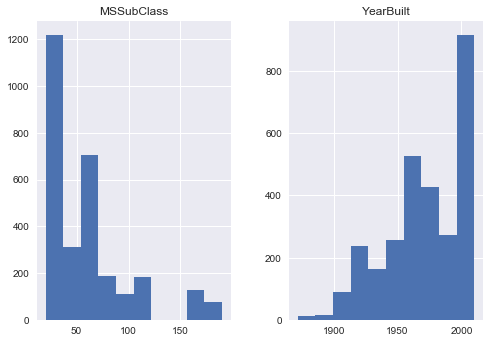

In [385]:
df_new.hist(column=['MSSubClass','YearBuilt'])
plt.show()

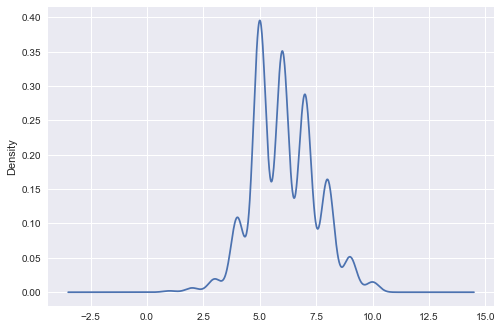

In [386]:
df_new['OverallQual'].plot.kde()
plt.show()

In [387]:
#predictor variable
Y = df_train['SalePrice']

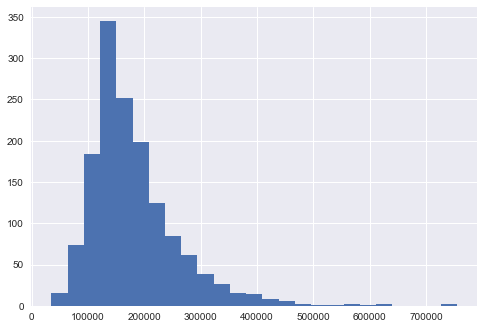

In [388]:
plt.hist(Y,bins=25)
plt.show()

Looks like right skewed distribution - take log

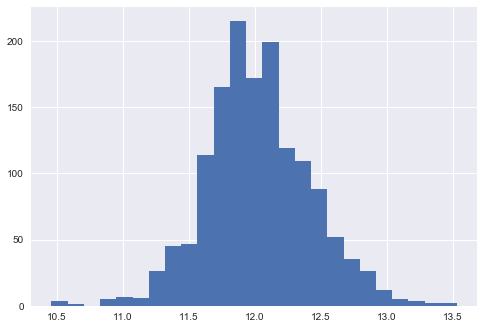

In [389]:
plt.hist(np.log(Y),bins=25)
plt.show()

In [390]:
#looks alright
Y=np.log(Y)

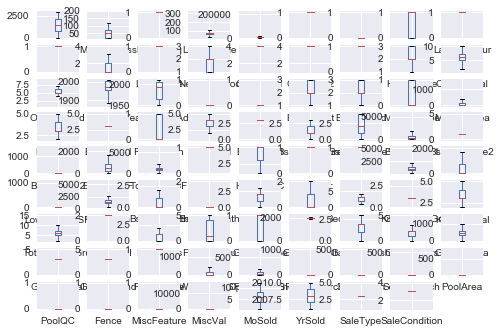

In [391]:
df_new.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False)
plt.show()

In [392]:
correlations=df_train.corr()

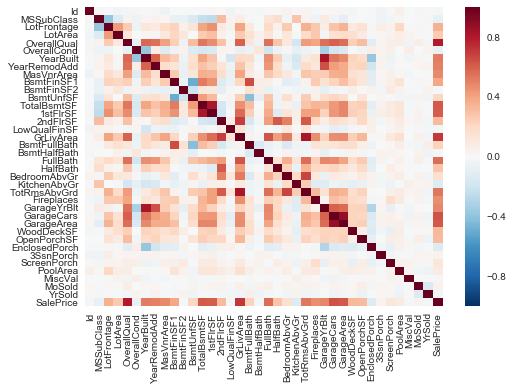

In [393]:
sns.heatmap(correlations)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [394]:
print (correlations['SalePrice'].sort_values(ascending=False)[:5], '\n')


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [395]:
print (correlations['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


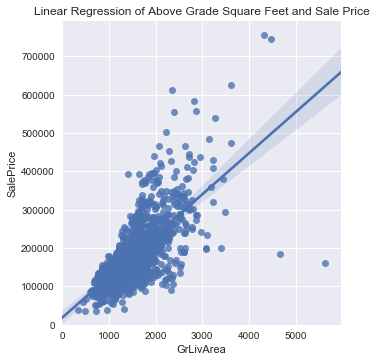

In [396]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train);
plt.title("Linear Regression of Above Grade Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

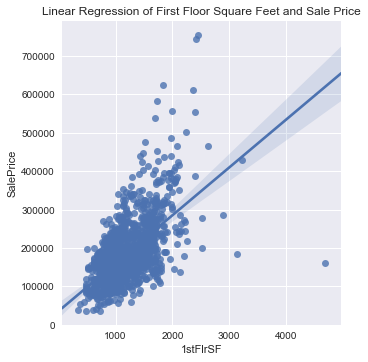

In [397]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=df_train)
plt.title("Linear Regression of First Floor Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

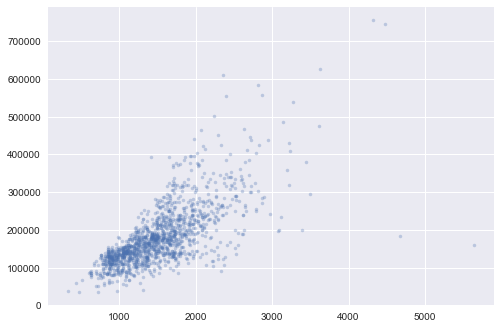

In [398]:
plt.plot(df_train.GrLivArea, df_train.SalePrice,'.', alpha = 0.3)
plt.show()

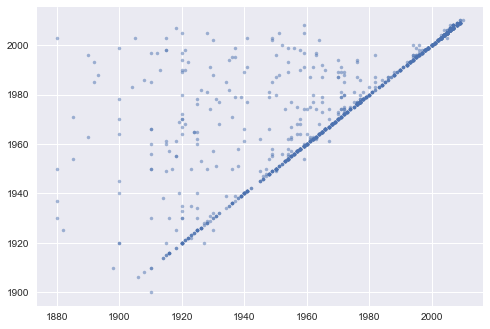

In [399]:
plt.plot(df_train.YearBuilt, df_train.GarageYrBlt,'.', alpha = 0.5)
plt.show()

some garages are built in future?? record claims that garage was built in 2207!

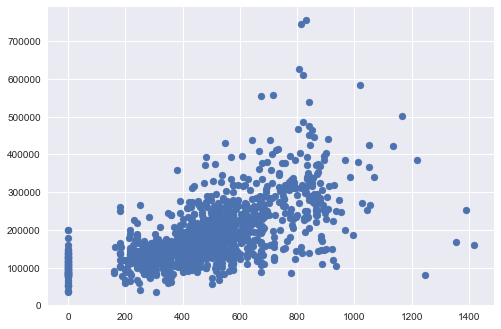

In [400]:
plt.scatter(df_train.GarageArea, df_train.SalePrice)
plt.show()

### Feature Engineering

In [401]:
Livingtotalsq = df_new['TotalBsmtSF'] + df_new['1stFlrSF'] + df_new['2ndFlrSF'] + df_new['GarageArea'] + df_new['WoodDeckSF'] + df_new['OpenPorchSF']
df_new['LivingTotalSF'] = Livingtotalsq

In [402]:
# Total Living Area divided by LotArea
df_new['PercentSQtoLot'] = df_new['LivingTotalSF'] / df_new['LotArea']

In [403]:
# Percentage of total rooms are bedrooms
df_new['PercentBedrmtoRooms'] = df_new['BedroomAbvGr'] / df_new['TotRmsAbvGrd']

In [404]:
# Number of years since last remodel, if there never was one it would be since it was built
df_new['YearSinceRemodel'] = 2016 - ((df_new['YearRemodAdd'] - df_new['YearBuilt']) + df_new['YearBuilt'])

In [405]:
#garage interaction
df_new['GarageInteraction'] = df_new['GarageQual']*df_new['GarageCars']

In [406]:
#average room size - open concept
df_new['AvgRmsize'] = df_new['GrLivArea']/ df_new['TotRmsAbvGrd']

In [407]:
#bathroom to room ratio
df_new['BathtoRoom'] = (df_new['HalfBath'] + df_new['FullBath'])/df_new['GrLivArea']

In [408]:
#comparative size of living area
df_new['CompLivArea']=df_new['GrLivArea']/df_new['GrLivArea'].mean()

In [409]:
df_new['LandscapInability']=df_new['LotShape']*df_new['LandContour']

In [410]:
df_new['GarageAge']=df_new['GarageYrBlt']-df_new['YearBuilt']

One hot encoding

In [411]:
categorical_features=['LotConfig','Neighborhood','Condition1','Condition2', 'HouseStyle','OverallQual','OverallCond','Exterior1st','Exterior2nd',
          'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
          'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
          'GarageCond','SaleType','SaleCondition']

In [412]:
df_dummies = pd.get_dummies(data= df_new,columns=categorical_features)

Train the model

In [413]:
np.random.seed(1)
X=df_dummies[:1460]
X.drop(['Id'],axis=1,inplace=True)

C:\Users\Bhagya Amarasekara\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor


In [415]:
X_scaled = scale(X)

In [416]:
model= LinearRegression()

In [419]:
#cross validation set
scores = cross_val_score(model, X, Y, cv=10)
predictions = cross_val_predict(model, X, Y, cv=10)
print(np.sqrt(mean_squared_error(Y,predictions)))

0.139945674526


In [420]:
# test set
model.fit(X,Y)
X_test=df_dummies[1460:]
X_test.drop(['Id'],axis=1,inplace=True)
Y_pred = model.predict(X_test)

C:\Users\Bhagya Amarasekara\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Preparation for submission

In [421]:
submission = pd.DataFrame()
submission['Id'] = df_dummies[1460:]['Id']
final_predictions = np.exp(Y_pred)
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('submission1.csv', index=False)

cross validation score is close to the Kaggle score. Therefore, now we can improve the model trying different suitable methods and then using ensemble methods.